# [Guided Project: Finding the best market to advertise in](https://app.dataquest.io/m/310/guided-project%3A-finding-the-best-markets-to-advertise-in)

-------

## Intro: Where should we spend money to make more money?

Advertisement can be very powerful weapon. The problem is how to wield it and getting the most out of what is invested to it. In this occasion we'll look into finding the best market that would yield the most profit out of the investment.

To do this we need data. [freeCodeCamp 2017 new coder survey](https://github.com/freeCodeCamp/2017-new-coder-survey/blob/master/clean-data/2017-fCC-New-Coders-Survey-Data.csv) is a suitable candidate for us to look into.

To solve this, we want the answers to:
1. Where are the potential new coders located?
2. What locations have the greatest number of new coders?
3. How big are they willing to spend on learning?

In [29]:
# Importing packages for data management 
import pandas as pd    # Importing pandas
import numpy as np     # Importing numpy
import datetime as dt  # Importing datetime
import re              # Importing regular expression
import warnings        # To suppress warning alert
warnings.filterwarnings('ignore')
#Change setting to avoid dataframe from truncating
pd.options.display.max_rows = 500
pd.options.display.width = 500
pd.options.display.max_colwidth = 500
pd.options.display.max_columns = 500

In [30]:
# Reading in the csv and displaying the dataframe 
ncs = pd.read_csv("2017-fCC-New-Coders-Survey-Data.csv")
ncs.head(5)

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,CodeEventFCC,CodeEventGameJam,CodeEventGirlDev,CodeEventHackathons,CodeEventMeetup,CodeEventNodeSchool,CodeEventNone,CodeEventOther,CodeEventRailsBridge,CodeEventRailsGirls,CodeEventStartUpWknd,CodeEventWkdBootcamps,CodeEventWomenCode,CodeEventWorkshops,CommuteTime,CountryCitizen,CountryLive,EmploymentField,EmploymentFieldOther,EmploymentStatus,EmploymentStatusOther,ExpectedEarning,FinanciallySupporting,FirstDevJob,Gender,GenderOther,HasChildren,HasDebt,HasFinancialDependents,HasHighSpdInternet,HasHomeMortgage,HasServedInMilitary,HasStudentDebt,HomeMortgageOwe,HoursLearning,ID.x,ID.y,Income,IsEthnicMinority,IsReceiveDisabilitiesBenefits,IsSoftwareDev,IsUnderEmployed,JobApplyWhen,JobInterestBackEnd,JobInterestDataEngr,JobInterestDataSci,JobInterestDevOps,JobInterestFrontEnd,JobInterestFullStack,JobInterestGameDev,JobInterestInfoSec,JobInterestMobile,JobInterestOther,JobInterestProjMngr,JobInterestQAEngr,JobInterestUX,JobPref,JobRelocateYesNo,JobRoleInterest,JobWherePref,LanguageAtHome,MaritalStatus,MoneyForLearning,MonthsProgramming,NetworkID,Part1EndTime,Part1StartTime,Part2EndTime,Part2StartTime,PodcastChangeLog,PodcastCodeNewbie,PodcastCodePen,PodcastDevTea,PodcastDotNET,PodcastGiantRobots,PodcastJSAir,PodcastJSJabber,PodcastNone,PodcastOther,PodcastProgThrowdown,PodcastRubyRogues,PodcastSEDaily,PodcastSERadio,PodcastShopTalk,PodcastTalkPython,PodcastTheWebAhead,ResourceCodecademy,ResourceCodeWars,ResourceCoursera,ResourceCSS,ResourceEdX,ResourceEgghead,ResourceFCC,ResourceHackerRank,ResourceKA,ResourceLynda,ResourceMDN,ResourceOdinProj,ResourceOther,ResourcePluralSight,ResourceSkillcrush,ResourceSO,ResourceTreehouse,ResourceUdacity,ResourceUdemy,ResourceW3S,SchoolDegree,SchoolMajor,StudentDebtOwe,YouTubeCodeCourse,YouTubeCodingTrain,YouTubeCodingTut360,YouTubeComputerphile,YouTubeDerekBanas,YouTubeDevTips,YouTubeEngineeredTruth,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston
0,27.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15 to 29 minutes,Canada,Canada,software development and IT,NaN,Employed for wages,NaN,NaN,NaN,NaN,female,NaN,NaN,1.0,0.0,1.0,0.0,0.0,0.0,NaN,15.0,02d9465b21e8bd09374b0066fb2d5614,eb78c1c3ac6cd9052aec557065070fbf,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,start your own business,NaN,NaN,NaN,English,married or domestic partnership,150.0,6.0,6f1fbc6b2b,2017-03-09 00:36:22,2017-03-09 00:32:59,2017-03-09 00:59:46,2017-03-09 00:36:26,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,"some college credit, no degree",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,34.0,0.0,NaN,NaN,NaN,NaN,NaN,"less than 100,000",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States of America,United States of America,NaN,NaN,Not working but looking for work,NaN,35000.0,NaN,NaN,male,NaN,NaN,1.0,0.0,1.0,0.0,0.0,1.0,NaN,10.0,5bfef9ecb211ec4f518cfc1d2a6f3e0c,21db37adb60cdcafadfa7dca1b13b6b1,NaN,0.0,0.0,0.0,NaN,Within 7 to 12 months,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,work for a nonprofit,1.0,Full-Stack Web Developer,in an office with other developers,English,"single, never married",80.0,6.0,f8f8be6910,2017-03-09 00:37:07,2017-03-09 00:33:26,2017-03-09 00:38:59,2017-03-09 00:37:10,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,1.0,"some college credit, no degree",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,21.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,NaN,

In [31]:
# go_describe: Function that returns a modified dataframe.describe() result 
def go_describe(df, data = 'num'):
    '''Return transposed pandas describe with share of 
    nan-values. Parameters: df = pandas.DataFrame'''
    df_des = df.describe(include='all').transpose() 
    df_des['share_nan'] = (1-(df_des['count']/df.shape[0]))*100
    df_des['count_nan'] = (df.shape[0]-df_des['count']).astype(int)
    df_des['count'] = df_des['count'].astype(int)
    df_des['mode'] = df.mode(axis='index',numeric_only=False).iloc[0,:].transpose()
    df_des['median'] = df.median(axis='index',numeric_only=True).transpose()
    option = data
    if option == 'num':
        order = ['25%', '50%', '75%', 'count', 'count_nan', 'share_nan','mean','median','mode', 'std', 'min', 'max']
    elif option == 'cat':
        order = ['count', 'count_nan', 'share_nan','mode']
    df_des = df_des[order].sort_values(by=['count_nan'],ascending=False).style.background_gradient(subset='count_nan', low=0, high=1, cmap='Blues')
    return df_des.data

go_describe(ncs)

,25%,50%,75%,count,count_nan,share_nan,mean,median,mode,std,min,max
GenderOther,NaN,NaN,NaN,55,18120,99.6974,NaN,NaN,genderfluid,NaN,NaN,NaN
CodeEventRailsGirls,1,1,1,132,18043,99.2737,1,1.0,1,0,1,1
CodeEventRailsBridge,1,1,1,133,18042,99.2682,1,1.0,1,0,1,1
CodeEventDjangoGirls,1,1,1,165,18010,99.0922,1,1.0,1,0,1,1
PodcastGiantRobots,1,1,1,187,17988,98.9711,1,1.0,1,0,1,1
YouTubeSimplilearn,1,1,1,201,17974,98.8941,1,1.0,1,0,1,1
JobInterestOther,NaN,NaN,NaN,266,17909,98.5365,NaN,NaN,Undecided,NaN,NaN,NaN
CodeEventGameJam,1,1,1,290,17885,98.4044,1,1.0,1,0,1,1
CodeEventGirlDev,1,1,1,297,17878,98.3659,1,1.0,1,0,1,1
PodcastTheWebAhead,1,1,1,311,17864,98.2889,1,1.0,1,0,1,1


## Looking at the job role interest

In [32]:
# Importing packages for basic data visualisation 
import matplotlib.pyplot as plt    # Importing matplotlib
import matplotlib as mpl           # Importing mpl
import matplotlib.ticker as ticker # Importing ticker
import seaborn as sns              # Importing seaborn
%matplotlib inline

In [124]:
ncs['num_interests'] = ncs['JobRoleInterest'].str.split(',').apply(lambda x: len(x))
pd.DataFrame(ncs['num_interests'].value_counts(normalize=True)*100)

,num_interests
1,31.650458
3,15.889588
4,15.217391
5,12.042334
2,10.883867
6,6.721968
7,3.861556
8,1.759153
9,0.986842
10,0.471968


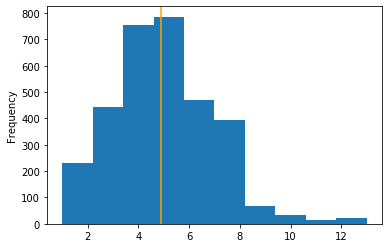

In [34]:
# Histogram on distribution of number of job role interests that the respondents have 
job_role.num_interests.plot.hist()
plt.axvline(job_role.num_interests.mean(),color='orange')
plt.show()

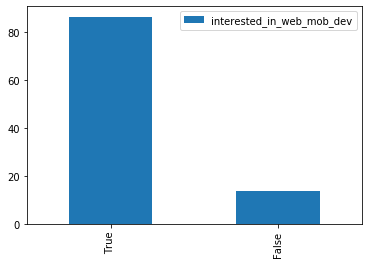

In [95]:
ncs['interested_in_web_mob_dev'] = ncs['JobRoleInterest'].str.contains('web|mobile',flags=re.IGNORECASE,regex=True)
pd.DataFrame(ncs['interested_in_web_mob_dev'].value_counts(normalize=True)*100).plot.bar()
plt.show()

## Page three
Figure out whether the sample we have is representative for our population of interest.
The JobRoleInterest column describes for every participant the role(s) they'd be interested in working.
Generate a frequency distribution table for this column. Take percentages instead of absolute frequencies.
Analyze the table.
- Are people interested in only one subject or they can be interested in more than one subject?
- If most people are interested in more than one subject, is this sample still representative?
- The focus of our courses is on web and mobile development. How many people are interested in at least one of these two subjects?

Generate at least one graph while you're working on these steps to help the reader understand easier what you're doing.
Use Markdown cells to explain the readers what you're doing.

In [98]:
ncs = ncs[ncs['JobRoleInterest'].notnull()]

## Page four
To make sure you're working with a representative sample, drop all the rows where participants didn't answer what role they are interested in. Where a participant didn't respond, we can't know for sure what their interests are, so it's better if we leave out this category of participants.
- Generate a frequency table for the CountryLive variable.
- Generate both absolute and relative frequencies.
- Analyze the results.
- Based on the results, what are the two markets you'd choose for advertisement?

Can we stop the analysis here, or we need to go more in depth?

In [127]:
# Country frequency 
abs_freq = ncs['CountryLive'].value_counts()
rel_freq = ncs['CountryLive'].value_counts(normalize=True)*100
pd.DataFrame(data={'Abs_frequency':abs_freq,'Rel_frequency':rel_freq})

,Abs_frequency,Rel_frequency
United States of America,3125,45.700497
India,528,7.721556
United Kingdom,315,4.606610
Canada,260,3.802281
Poland,131,1.915765
Brazil,129,1.886517
Germany,125,1.828020
Australia,112,1.637906
Russia,102,1.491664
Ukraine,89,1.301550


## Page five 
Create a new column that describes the amount of money a student has spent per month (at the moment they completed the survey).

You'll need to divide the MoneyForLearning column to the MonthsProgramming column.
Some students answered that they had been learning to code for 0 months (it might be that they had just started when they completed the survey). To avoid dividing by 0, replace all the values of 0 with 1.
Find out how many null values there are in the new column (the column describing the amount of money students spend per month).

- Keep only the rows that don't have a null value for the new column.
- Remove also any rows that have null values in the CountryLive column.
- Group the remaining data by the CountryLive column and find out how much money a student spends on average each month in the US, India, the United Kingdom and Canada.
- You can use the DataFrame.groupby() method.
- As a summary metric, we recommend choosing the mean to take into account all values in the distributions. You can also compute the median or the mode to see how they compare with the mean.

Analyze the results. Is there anything in the results that looks off?

In [131]:
# Finding out amount of money spent on lerning per month by respondents 
ncs['amt_spend_month'] = ncs['MoneyForLearning'] / ncs['MonthsProgramming'].replace(0,1)

In [132]:
ncs = ncs[ncs['amt_spend_month'].notnull()]

In [134]:
countries_mean = ncs.groupby('CountryLive').mean()
pd.DataFrame(countries_mean['amt_spend_month'][['United States of America','India','United Kingdom','Canada']])

,amt_spend_month
CountryLive,
United States of America,227.997996
India,135.100982
United Kingdom,45.534443
Canada,113.510961


In [135]:
# Importing plotly packages 
import plotly.express as px        # For quick plotly charts
import plotly.figure_factory as ff # For combined distribution plots
import plotly.graph_objects as go  # For a more customized settings

In [148]:
fig = px.box(ncs.query("CountryLive==['United States of America','India','United Kingdom','Canada']"), x='CountryLive',y='amt_spend_month',hover_data=['NetworkID'])
fig.show()

In [183]:
# Removing outlier of monthly expenditure > 10000
ncs_cleaned = ncs[(ncs['amt_spend_month']>0.99)&(ncs['amt_spend_month']<20000)]
fig = px.box(ncs_cleaned.query("CountryLive==['United States of America','India','United Kingdom','Canada']"),y='amt_spend_month',hover_data=['NetworkID'])
fig.show()

In [182]:
ncs['amt_spend_month'].value_counts().sort_index()

0.000000        3092
0.033333           1
0.050000           1
0.055556           1
0.066667           1
0.103448           1
0.138889           1
0.166667           1
0.192308           1
0.200000           2
0.208333           1
0.222222           1
0.250000           1
0.277778           1
0.333333           4
0.357143           1
0.400000           1
0.405405           1
0.416667          17
0.428571           1
0.431034           1
0.433333           1
0.500000           3
0.555556           6
0.588235           1
0.595238           1
0.600000           1
0.625000           3
0.666667           8
0.672043           1
0.694444           1
0.708333           1
0.714286           2
0.750000           1
0.766667           1
0.769231           1
0.833333          27
0.900000           1
0.909091           1
0.946970           1
1.000000          13
1.041667           9
1.052632           1
1.071429           1
1.111111           2
1.142857           1
1.162791           1
1.190476     

In [173]:
countries_mean = ncs_cleaned.groupby('CountryLive').mean()
pd.DataFrame(countries_mean['amt_spend_month'][['United States of America','India','United Kingdom','Canada']])

,amt_spend_month
CountryLive,
United States of America,11.105736
India,6.354519
United Kingdom,10.401824
Canada,8.797879


In [163]:
# Outliers
outlier = ncs[ncs['amt_spend_month']>5000]
fig = px.scatter(outlier.query("CountryLive==['United States of America','India','United Kingdom','Canada']"), x='CountryLive',y='amt_spend_month',hover_data=['NetworkID'])
fig.show()

## Page six
Generate four box plots on the same figure to visualize for each country (the US, India, the United Kingdom, Canada) the distribution of the variable that describes how much money each participant had spent per month.

Can you spot extreme outliers for India, Canada or the United Kingdom?
If not, what extreme outliers can you spot?
Eliminate the extreme outliers.

Recompute the mean values, just like we did in the previous screen: group the data by the CountryLive column, and then find out how much money a student spends on average each month in the US, India, the United Kingdom and Canada.

If the mean values still look off, look more for extreme outliers. For instance, you can find a couple of persons in India who spend $5000 per month. Isolate these respondents and examine their answers to other questions in the survey to figure out whether these big expenses with learning are justified — you can try to find out whether they attended any bootcamp, which might justify the large amount of money spent.
If you find more extreme outliers, remove them, and recompute the mean values.
If you get stuck, you can always sneak a look at the solution notebook.
Is it clear enough at this point what are the two best countries to choose for advertisement?

## Page seven
Try to choose the second market to advertise in.

Remember that we sell subscriptions at a price of $59 per month.
Make sure you also consider the number of potential customers in each country.
Based on all of the results you've found so far, brainstorm a couple of possible decisions.

- Does it make sense to advertise in more then two countries?
- Does it make sense to split the advertising budget unequally (e.g.: spend 70% to advertise in the US and 30% to advertise in India)?
- Does it make sense to advertise only in the US?
- If we had a marketing team in our company, would it be better to just send them our results and let them use their domain knowledge to take the best decision?

## Page eight
In this project, we analyzed survey data from new coders to find the best two markets to advertise in. The only solid conclusion we reached is that the US would be a good market to advertise in.

For the second best market, it wasn't clear-cut what to choose between India and Canada. We decided to send the results to the marketing team so they can use their domain knowledge to take the best decision.

You might have reached different conclusions, which is totally fine, as long as you constructed a sound reasoning for those conclusions. Try to wrap up your work by writing a conclusion section that has no more than two paragraphs.

You can also continue working on this project. Next steps include:

Finding other criteria for choosing the best market.
Analyzing other data sets:
- [freeCodeCamp's 2016 New Coders Survey](https://github.com/freeCodeCamp/2016-new-coder-survey).
- [Stack Overflow 2018 Developer Survey](https://www.kaggle.com/stackoverflow/stack-overflow-2018-developer-survey).


[SOLUTION](https://github.com/dataquestio/solutions/blob/master/Mission310Solutions.ipynb)